<a href="https://colab.research.google.com/github/dibadabir/Project3A23/blob/main/Sentiment_Analysis_Results_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing libraries

In [1]:
# Regular expression module allows pattern matching and manipulation of strings
import re
# Making dataframe
import pandas as pd
# Saving data into numpy array
import numpy as np
# The natrual language processing to process sentences
import nltk
# Used to display they results on a bar chart (graph)
import matplotlib.pyplot as plt
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
# Splitting our dataset into train and test
from sklearn.model_selection import train_test_split
# Get the report from evaluating models
from sklearn.metrics import classification_report, accuracy_score
# Converting text data into numerical vectors so that the machine can read it
from sklearn.feature_extraction.text import TfidfVectorizer
# Saving and loading the model
import pickle

# Loading the dataset

In [2]:
# Load the data from excel file
data = pd.read_excel('/content/Training Dataset.xlsx')

# Extract sentences and labels
sentences = data['sentence'].values
labels = data['sentiment'].values

# Split the data into training and testing sets (80% for training, 20% for testing)
train_sentences, test_sentences, train_labels, test_labels = train_test_split(sentences, labels, shuffle=True, test_size=0.2, random_state=230)

# Vectorize the text data using TfidfVectorizer
vec = TfidfVectorizer()                                         # Vectorizing the text
train_sentences_vectors = vec.fit_transform(train_sentences)    # Feed the training dataset to our model
test_sentences_vectors = vec.transform(test_sentences)          # Transform the test data so that the machine can perform the analysis

# Random Forest Model

In [3]:
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier

# Initialize and train the Random Forest classifier
clf_rf = RandomForestClassifier()  # Initialize RandomForestClassifier
clf_rf.fit(train_sentences_vectors, train_labels)  # Fit the classifier on the training data

# Predict using the trained Random Forest classifier
clf_rf_pred = clf_rf.predict(test_sentences_vectors)

# Evaluate the model using accuracy_score and Classification_report functions
print("Random Forest Accuracy:", accuracy_score(test_labels, clf_rf_pred))


Random Forest Accuracy: 0.6666666666666666


# Save the model

In [4]:
# Save model to a file
model_save_path = '/content/RandomForest_model.pkl'
with open(model_save_path, 'wb') as f:
  pickle.dump(clf_rf, f)

print(f'Random Forest model saved to {model_save_path}')

Random Forest model saved to /content/RandomForest_model.pkl


# Loading the Model

In [5]:
# Load the model
model_load_path = '/content/RandomForest_model.pkl'
with open(model_save_path, 'rb') as f:
  RF_model = pickle.load(f)

# Load the Unknown Data

In [6]:
# Load the Excel file
excel_file = pd.ExcelFile('/content/Speech to Text (Combined, no number, CLEANED) - Vader.xlsx')

# List all sheet names
sheet_names = excel_file.sheet_names

print('Sheet names from the file:\n')
for i in sheet_names:
  print(i)

Sheet names from the file:

Combined
E-Commerce
Education
Fashion
GenAI
Healthcare
Travel


# Function to visualise the results

In [7]:
def horizontal_bar(sentiment_count, category):
    # Extract sentiments and counts for only positive and negative sentiments
    labels = ['positive', 'negative']
    counts = [sentiment_count[label] for label in labels]

    # Calculate percentages
    total = sum(counts)
    percentages = [(count / total) * 100 for count in counts]

    # Create a figure
    plt.figure(figsize=(15, 1.5))  # Adjust the width and height as needed

    # Create horizontal bar chart
    plt.barh(labels, percentages, color=['green', 'red'], height=0.5)

    # Add percentages labels
    for i, percentage in enumerate(percentages):
        plt.text(percentage + 0.5, i, f'{percentage:.1f}%', va='center')

    # Display labels on the left
    plt.gca().invert_yaxis()

    # Add title and labels
    plt.title(f'{category} Sentiment Distribution')
    plt.xlabel('Percentage')
    plt.ylabel('Sentiment')

    plt.show()

# Predicting E-Commerce

In [8]:
# Choose a specific sheet
selected_sheet = 'E-Commerce'

# Saving the data in a dataframe
ecommerce_speech = excel_file.parse(selected_sheet)

ecommerce_speech_vec = vec.transform(ecommerce_speech['sentence'].values)

# Predict using the trained model
ecommerce_pred = RF_model.predict(ecommerce_speech_vec)

Counting the results

In [9]:
# Initialize counts for each sentiment
ecommerce_sentiment_counts = {'positive': 0, 'negative': 0, 'neutral': 0}

# Count occurrences of each sentiment
for sentiment in ecommerce_pred:
    ecommerce_sentiment_counts[sentiment] += 1

# Print the counts
print("Number of positives:", ecommerce_sentiment_counts['positive'])
print("Number of negatives:", ecommerce_sentiment_counts['negative'])
print("Number of neutrals:", ecommerce_sentiment_counts['neutral'])

Number of positives: 68
Number of negatives: 27
Number of neutrals: 107


Visualising on bar chart

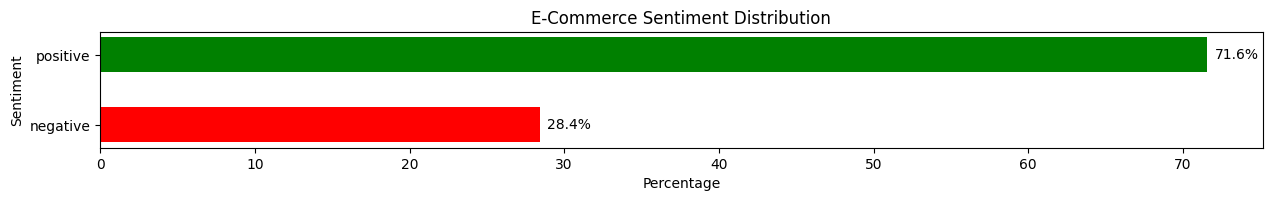

In [10]:
horizontal_bar(ecommerce_sentiment_counts, 'E-Commerce')

# Predicting Education

In [11]:
# Choose a specific sheet
selected_sheet = 'Education'

# Saving the data in a dataframe
education_speech = excel_file.parse(selected_sheet)

education_speech_vec = vec.transform(education_speech['sentence'].values)

# Predict using the trained model
education_pred = RF_model.predict(education_speech_vec)

Counting the results

In [12]:
# Initialize counts for each sentiment
education_sentiment_counts = {'positive': 0, 'negative': 0, 'neutral': 0}

# Count occurrences of each sentiment
for sentiment in education_pred:
    education_sentiment_counts[sentiment] += 1

# Print the counts
print("Number of positives:", education_sentiment_counts['positive'])
print("Number of negatives:", education_sentiment_counts['negative'])
print("Number of neutrals:", education_sentiment_counts['neutral'])

Number of positives: 61
Number of negatives: 23
Number of neutrals: 150


Visualising on bar chart

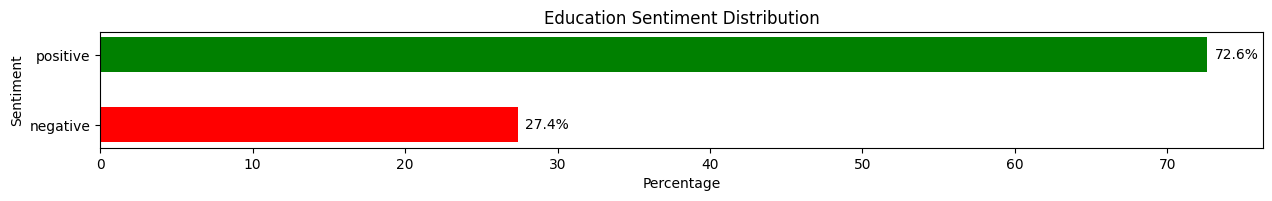

In [13]:
horizontal_bar(education_sentiment_counts, 'Education')

# Predicting Fashion

In [14]:
# Choose a specific sheet
selected_sheet = 'Fashion'

# Saving the data in a dataframe
fashion_speech = excel_file.parse(selected_sheet)

fashion_speech_vec = vec.transform(fashion_speech['sentence'].values)

# Predict using the trained model
fashion_pred = RF_model.predict(fashion_speech_vec)

counting the reults

In [15]:
# Initialize counts for each sentiment
fashion_sentiment_counts = {'positive': 0, 'negative': 0, 'neutral': 0}

# Count occurrences of each sentiment
for sentiment in fashion_pred:
    fashion_sentiment_counts[sentiment] += 1

# Print the counts
print("Number of positives:", fashion_sentiment_counts['positive'])
print("Number of negatives:", fashion_sentiment_counts['negative'])
print("Number of neutrals:", fashion_sentiment_counts['neutral'])

Number of positives: 93
Number of negatives: 32
Number of neutrals: 272


Visualising on bar chart

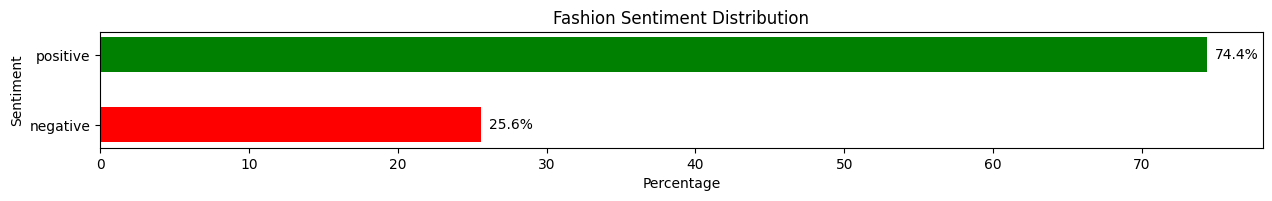

In [16]:
horizontal_bar(fashion_sentiment_counts, 'Fashion')

# Predicting Generative AI

In [17]:
# Choose a specific sheet
selected_sheet = 'GenAI'

# Saving the data in a dataframe
genai_speech = excel_file.parse(selected_sheet)

genai_speech_vec = vec.transform(genai_speech['sentence'].values)

# Predict using the trained model
genai_pred = RF_model.predict(genai_speech_vec)

Counting the results

In [18]:
# Initialize counts for each sentiment
genai_sentiment_counts = {'positive': 0, 'negative': 0, 'neutral': 0}

# Count occurrences of each sentiment
for sentiment in genai_pred:
    genai_sentiment_counts[sentiment] += 1

# Print the counts
print("Number of positives:", genai_sentiment_counts['positive'])
print("Number of negatives:", genai_sentiment_counts['negative'])
print("Number of neutrals:", genai_sentiment_counts['neutral'])

Number of positives: 107
Number of negatives: 51
Number of neutrals: 177


Visualising on bar chart

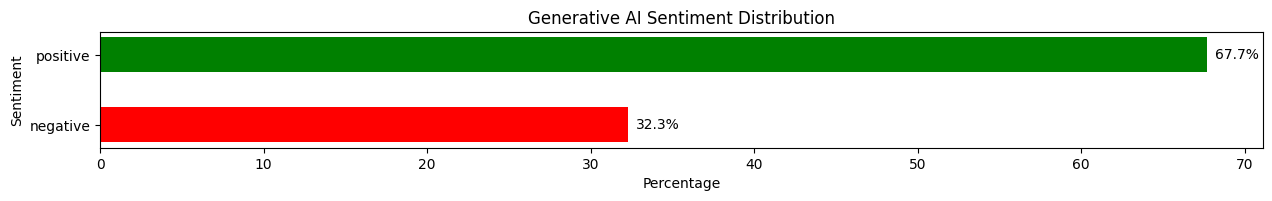

In [19]:
horizontal_bar(genai_sentiment_counts, 'Generative AI')

# Predicting Healthcare

In [20]:
# Choose a specific sheet
selected_sheet = 'Healthcare'

# Saving the data in a dataframe
healthcare_speech = excel_file.parse(selected_sheet)

healthcare_speech_vec = vec.transform(healthcare_speech['sentence'].values)

# Predict using the trained model
healthcare_pred = RF_model.predict(healthcare_speech_vec)

Counting the results

In [21]:
# Initialize counts for each sentiment
healthcare_sentiment_counts = {'positive': 0, 'negative': 0, 'neutral': 0}

# Count occurrences of each sentiment
for sentiment in healthcare_pred:
    healthcare_sentiment_counts[sentiment] += 1

# Print the counts
print("Number of positives:", healthcare_sentiment_counts['positive'])
print("Number of negatives:", healthcare_sentiment_counts['negative'])
print("Number of neutrals:", healthcare_sentiment_counts['neutral'])

Number of positives: 74
Number of negatives: 36
Number of neutrals: 83


Visualising on bar chart

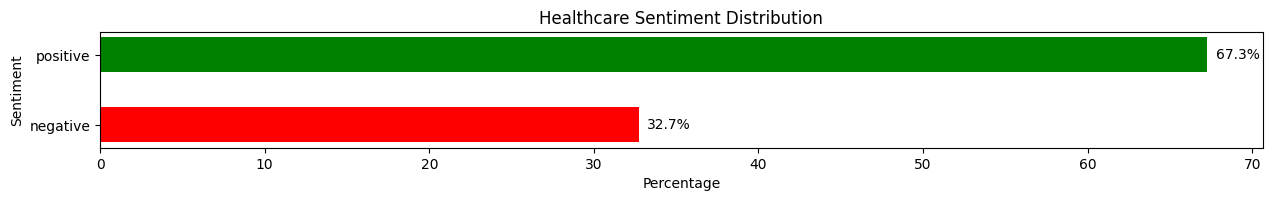

In [22]:
horizontal_bar(healthcare_sentiment_counts, 'Healthcare')

# Predicting Travel

In [23]:
# Choose a specific sheet
selected_sheet = 'Travel'

# Saving the data in a dataframe
travel_speech = excel_file.parse(selected_sheet)

travel_speech_vec = vec.transform(travel_speech['sentence'].values)

# Predict using the trained model
travel_pred = RF_model.predict(travel_speech_vec)

Counting the results

In [24]:
# Initialize counts for each sentiment
travel_sentiment_counts = {'positive': 0, 'negative': 0, 'neutral': 0}

# Count occurrences of each sentiment
for sentiment in travel_pred:
    travel_sentiment_counts[sentiment] += 1

# Print the counts
print("Number of positives:", travel_sentiment_counts['positive'])
print("Number of negatives:", travel_sentiment_counts['negative'])
print("Number of neutrals:", travel_sentiment_counts['neutral'])

Number of positives: 40
Number of negatives: 18
Number of neutrals: 71


Visualising on pie chart

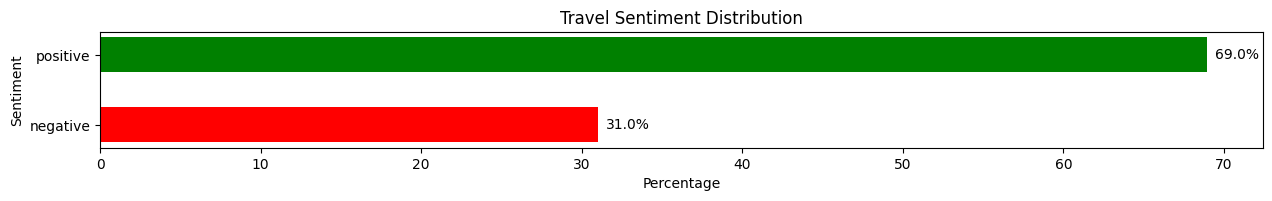

In [25]:
horizontal_bar(travel_sentiment_counts, 'Travel')